In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
from pylab import rcParams
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
rcParams['figure.figsize'] = 20, 10

In [ ]:
data1=pd.read_csv('/content/ADDYY.csv') #ADIDAS
data2=pd.read_csv('/content/AAPL.csv')  #APPLE
data3=pd.read_csv('/content/TM.csv')    #TOYOTA MOTORS

In [ ]:
data1.loc[:, 'Date'] = pd.to_datetime(data1['Date'],format='%Y-%m-%d')
data1['Month'] = data1['Date'].dt.month
data1.sort_values(by='Date', inplace=True, ascending=True)
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month
0,2011-06-13,35.889999,36.230000,35.869999,35.869999,31.387390,7000,6
1,2011-06-14,36.599998,36.700001,36.410000,36.509998,31.947405,11000,6
2,2011-06-15,36.360001,36.570000,35.849998,36.200001,31.676157,51000,6
3,2011-06-16,35.470001,35.570000,35.209999,35.360001,30.941120,20400,6
4,2011-06-17,36.500000,36.700001,36.299999,36.500000,31.938662,16800,6


In [ ]:
data2.loc[:, 'Date'] = pd.to_datetime(data2['Date'],format='%Y-%m-%d')
data2['Month'] = data2['Date'].dt.month
data2.sort_values(by='Date', inplace=True, ascending=True)
data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month
0,2011-06-13,11.685714,11.725357,11.609643,11.664286,10.030155,329473200,6
1,2011-06-14,11.785714,11.901786,11.761071,11.872857,10.209505,334569200,6
2,2011-06-15,11.776786,11.796429,11.602857,11.669643,10.034760,399196000,6
3,2011-06-16,11.675000,11.738571,11.368929,11.612857,9.985929,510591200,6
4,2011-06-17,11.749643,11.758929,11.405714,11.437857,9.835445,615020000,6


In [ ]:
data3.loc[:, 'Date'] = pd.to_datetime(data3['Date'],format='%Y-%m-%d')
data3['Month'] = data3['Date'].dt.month
data3.sort_values(by='Date', inplace=True, ascending=True)
data3.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month
0,2011-06-13,80.209999,80.260002,79.400002,79.720001,69.560913,836200,6
1,2011-06-14,80.080002,80.660004,80.040001,80.440002,70.189163,464200,6
2,2011-06-15,79.910004,80.330002,79.279999,79.480003,69.351509,550600,6
3,2011-06-16,79.239998,79.750000,79.029999,79.470001,69.342773,580200,6
4,2011-06-17,79.610001,79.900002,79.370003,79.510002,69.377678,375000,6


# ADIDAS

In [ ]:
num_crossval = int(0.2*len(data1))
num_test = int(0.2*len(data1))
num_train = len(data1) - num_crossval - num_test
data_crossvaltrain = data1[:num_train+num_crossval][['Date', 'Adj Close']]
data_train = data1[:num_train][['Date', 'Adj Close']]
data_crossval = data1[num_train:num_train+num_crossval][['Date', 'Adj Close']]
data_test = data1[num_train+num_crossval:][['Date', 'Adj Close']]
print("FOR ADIDAS")
print("Shape of Training data = " + str(data_train.shape))
print("Shape of Cross Validation data = " + str(data_crossval.shape))
print("Shape of Test Data = " + str(data_test.shape))

FOR ADIDAS
Shape of Training data = (1511, 2)
Shape of Cross Validation data = (503, 2)
Shape of Test Data = (503, 2)


Text(0, 0.5, 'Adj Closing Price')

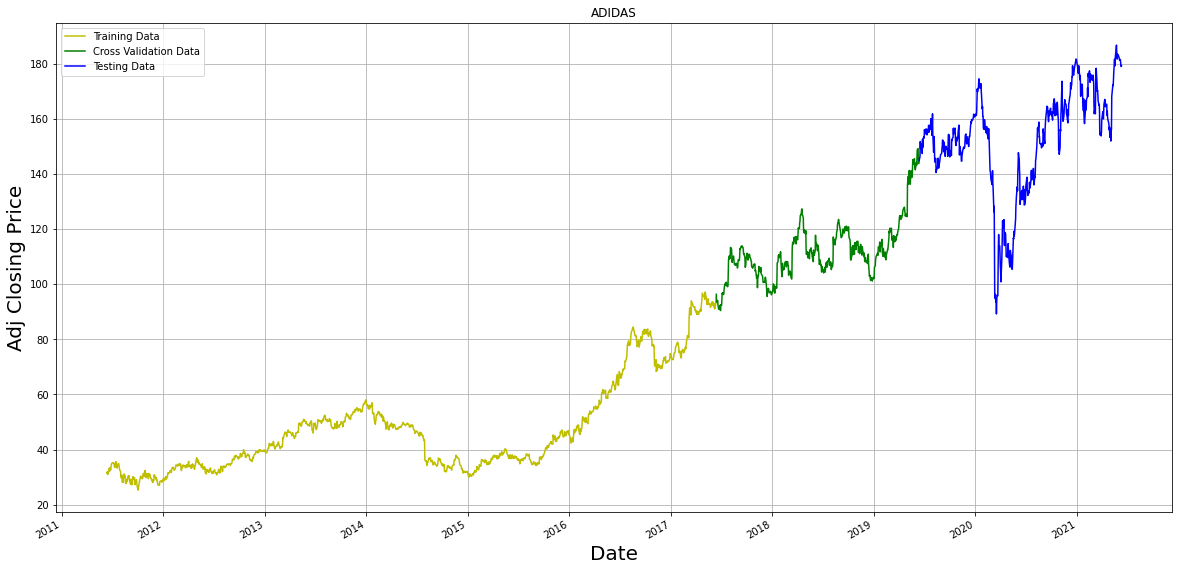

In [ ]:
plot = data_train.plot(x='Date', y='Adj Close', style='y-', grid=True,title="ADIDAS")
plot = data_crossval.plot(x='Date', y='Adj Close', style='g-', grid=True, ax=plot)
plot = data_test.plot(x='Date', y='Adj Close', style='b-', grid=True, ax=plot)
plot.legend(['Training Data', 'Cross Validation Data', 'Testing Data'])
plot.set_xlabel("Date",fontsize=20)
plot.set_ylabel("Adj Closing Price",fontsize=20)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_train_scaled=scaler.fit_transform(np.array(data_train['Adj Close']).reshape(-1,1))
x_train = []
y_train=[]
for i in range(3, len(data_train_scaled)):
      x_train.append(data_train_scaled[i-3:i,0])
      y_train.append(data_train_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],-1)
y_train=y_train.reshape(y_train.shape[0],-1)   
print(x_train.shape)
print(y_train.shape)

(1508, 3, 1)
(1508, 1)


In [ ]:
##building the lstm model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 50)             10400     
_________________________________________________________________
dropout (Dropout)            (None, 3, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
trainingmodel = model.fit(x_train, y_train, epochs = 10, batch_size = 20, validation_split=0.2)

Epoch 1/10
61/61 [==============================] - 5s 21ms/step - loss: 0.0122 - val_loss: 0.0424
Epoch 2/10
61/61 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0070
Epoch 3/10
61/61 [==============================] - 0s 7ms/step - loss: 6.9101e-04 - val_loss: 0.0030
Epoch 4/10
61/61 [==============================] - 0s 7ms/step - loss: 6.2210e-04 - val_loss: 0.0028
Epoch 5/10
61/61 [==============================] - 0s 7ms/step - loss: 5.3479e-04 - val_loss: 0.0035
Epoch 6/10
61/61 [==============================] - 0s 7ms/step - loss: 5.3031e-04 - val_loss: 0.0037
Epoch 7/10
61/61 [==============================] - 0s 8ms/step - loss: 5.9164e-04 - val_loss: 0.0019
Epoch 8/10
61/61 [==============================] - 0s 7ms/step - loss: 5.5154e-04 - val_loss: 0.0029
Epoch 9/10
61/61 [==============================] - 0s 7ms/step - loss: 5.4572e-04 - val_loss: 6.5974e-04
Epoch 10/10
61/61 [==============================] - 0s 7ms/step - loss: 5.1070e-04 -

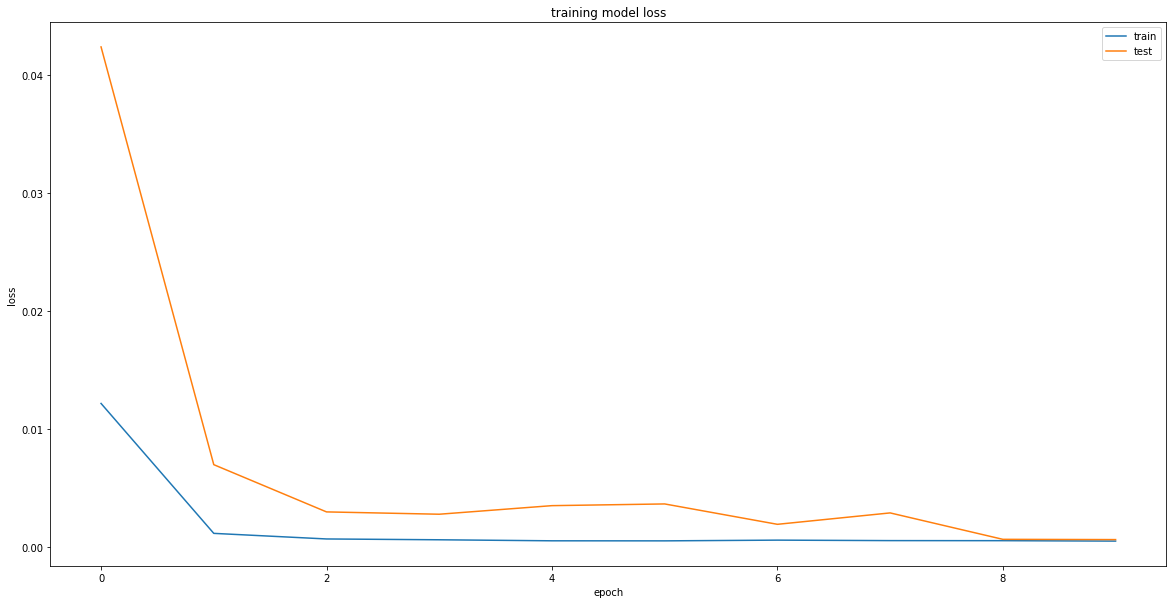

In [ ]:
plt.plot(trainingmodel.history['loss'])
plt.plot(trainingmodel.history['val_loss'])
plt.title('training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
score = model.evaluate(x_train, y_train);
print("Loss:",score)

48/48 [==============================] - 0s 3ms/step - loss: 3.0607e-04
Loss: 0.0003060724411625415


In [ ]:
arr=np.array(data_crossvaltrain['Adj Close']).reshape(-1,1)
crossval_x_scaled, crossval_y, mean_list, std_list = [], [], [], []
for i in range(num_train, len(arr)):
    mean_list.append(np.mean(arr[i-3:i]))
    std_list.append(np.std(arr[i-3:i]))
    crossval_x_scaled.append((arr[i-3:i]-mean_list[i-num_train])/std_list[i-num_train])
    crossval_y.append(arr[i])
crossval_x_scaled = np.array(crossval_x_scaled)
crossval_y = np.array(crossval_y)
scaler_final = MinMaxScaler()
train_crossval_final = scaler_final.fit_transform(arr)

In [ ]:
output=model.predict(crossval_x_scaled)
output = (output * np.array(std_list).reshape(-1,1)) + np.array(mean_list).reshape(-1,1)
print("output.shape = " + str(output.shape))
rmse= math.sqrt(mean_squared_error(crossval_y, output[:,0]))
print("RMSE = %0.3f" % rmse)
print("r2 score")
print(r2_score(crossval_y, output[:,0]))

output.shape = (503, 1)
RMSE = 2.476
r2 score
0.9457406202094815


Text(0, 0.5, 'ADJ CLOSING PRICE')

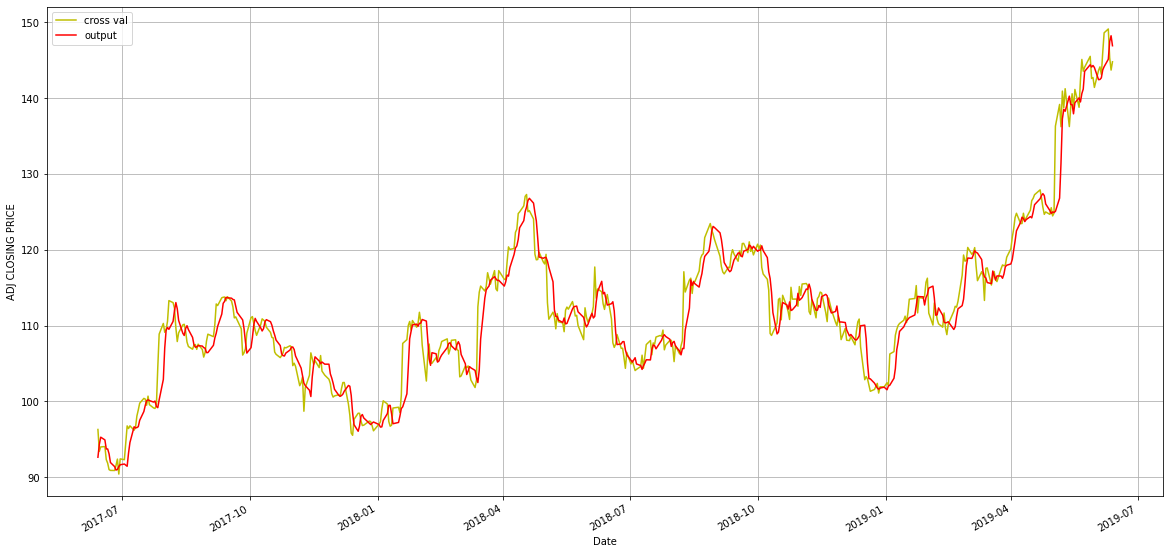

In [ ]:
outputdf = pd.DataFrame({'output': output[:,0].reshape(-1), 
                       'crossval_y': crossval_y.reshape(-1),
                       'Date': data_crossval['Date']})

p = data_crossval.plot(x='Date', y='Adj Close', style='y-', grid=True)
p = outputdf.plot(x='Date', y='output', style='r-', grid=True, ax=p)
p.legend([ 'cross val', 'output'])
p.set_xlabel("Date")
p.set_ylabel("ADJ CLOSING PRICE")

Text(0, 0.5, 'Adj Closing Price')

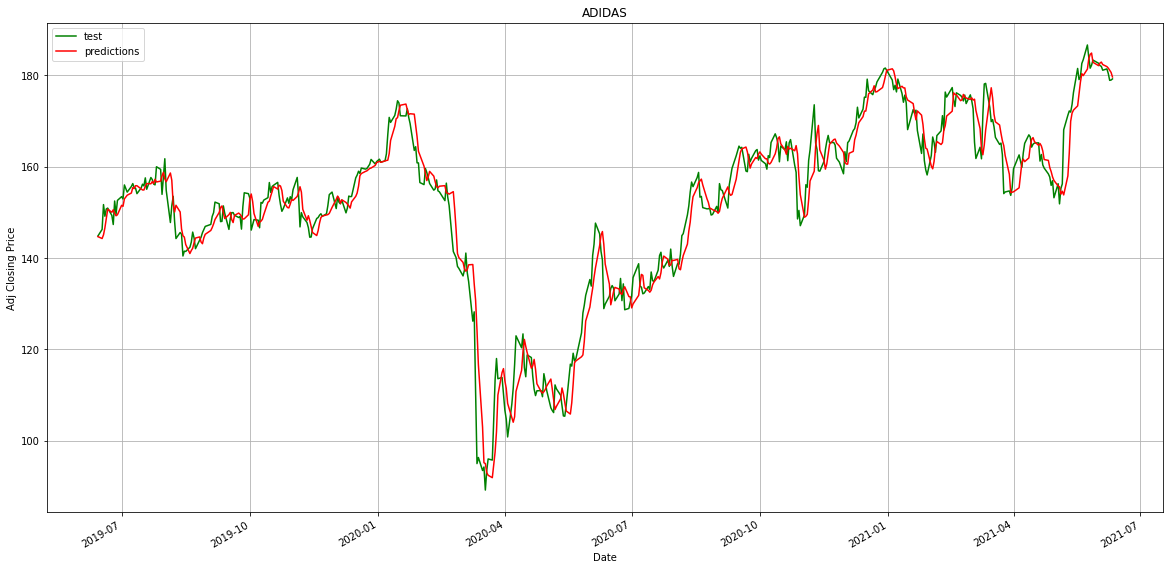

In [ ]:
ar=np.array(data1['Adj Close']).reshape(-1,1)
x_test_scaled, test_y, meantest_list, stdtest_list = [], [], [], []
for i in range(num_train+num_crossval, len(ar)):
    meantest_list.append(np.mean(ar[i-3:i]))
    stdtest_list.append(np.std(ar[i-3:i]))
    x_test_scaled.append((ar[i-3:i]-meantest_list[i-num_train-num_crossval])/stdtest_list[i-num_train-num_crossval])
    test_y.append([i])
x_test_scaled = np.array(x_test_scaled)
test_y = np.array(test_y)
outputtest=model.predict(x_test_scaled)
outputtest = (outputtest * np.array(stdtest_list).reshape(-1,1)) + np.array(meantest_list).reshape(-1,1)
ott_df = pd.DataFrame({'ott': outputtest[:,0].reshape(-1), 
                       'Date': data1[num_train+num_crossval:]['Date']})

p= data_test.plot(x='Date', y='Adj Close', style='g-', grid=True,title="ADIDAS")
p = ott_df.plot(x='Date', y='ott', style='r-', grid=True, ax=p)
p.legend([ 'test', 'predictions'])
p.set_xlabel("Date")
p.set_ylabel("Adj Closing Price")


# APPLE

FOR APPLE
Shape of Training data = (1511, 2)
Shape of Cross Validation data = (503, 2)
Shape of Test Data = (503, 2)


Text(0, 0.5, 'Adj Closing Price')

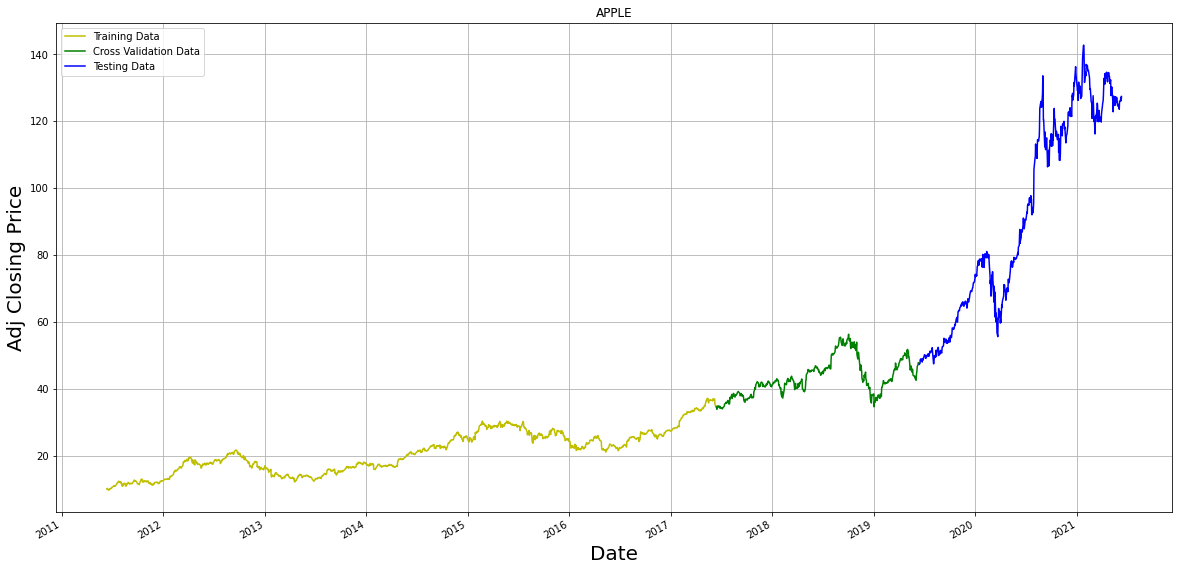

In [ ]:
num_crossval = int(0.2*len(data2))
num_test = int(0.2*len(data2))
num_train = len(data2) - num_crossval - num_test
data_crossvaltrain = data2[:num_train+num_crossval][['Date', 'Adj Close']]
data_train = data2[:num_train][['Date', 'Adj Close']]
data_crossval = data2[num_train:num_train+num_crossval][['Date', 'Adj Close']]
data_test = data2[num_train+num_crossval:][['Date', 'Adj Close']]
print("FOR APPLE")
print("Shape of Training data = " + str(data_train.shape))
print("Shape of Cross Validation data = " + str(data_crossval.shape))
print("Shape of Test Data = " + str(data_test.shape))

plot = data_train.plot(x='Date', y='Adj Close', style='y-', grid=True,title="APPLE")
plot = data_crossval.plot(x='Date', y='Adj Close', style='g-', grid=True, ax=plot)
plot = data_test.plot(x='Date', y='Adj Close', style='b-', grid=True, ax=plot)
plot.legend(['Training Data', 'Cross Validation Data', 'Testing Data'])
plot.set_xlabel("Date",fontsize=20)
plot.set_ylabel("Adj Closing Price",fontsize=20)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_train_scaled=scaler.fit_transform(np.array(data_train['Adj Close']).reshape(-1,1))
x_train = []
y_train=[]
for i in range(3, len(data_train_scaled)):
      x_train.append(data_train_scaled[i-3:i,0])
      y_train.append(data_train_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],-1)
y_train=y_train.reshape(y_train.shape[0],-1)   
print(x_train.shape)
print(y_train.shape)
##building the lstm model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

(1508, 3, 1)
(1508, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 3, 50)             10400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
trainingmodel = model.fit(x_train, y_train, epochs = 10, batch_size = 20, validation_split=0.2)

Epoch 1/10
61/61 [==============================] - 5s 20ms/step - loss: 0.0409 - val_loss: 0.0037
Epoch 2/10
61/61 [==============================] - 0s 8ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 3/10
61/61 [==============================] - 0s 8ms/step - loss: 0.0018 - val_loss: 9.5716e-04
Epoch 4/10
61/61 [==============================] - 0s 8ms/step - loss: 0.0019 - val_loss: 6.9537e-04
Epoch 5/10
61/61 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 6.0585e-04
Epoch 6/10
61/61 [==============================] - 0s 8ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 7/10
61/61 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 6.3410e-04
Epoch 8/10
61/61 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 5.9891e-04
Epoch 9/10
61/61 [==============================] - 0s 8ms/step - loss: 0.0016 - val_loss: 3.6198e-04
Epoch 10/10
61/61 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 0

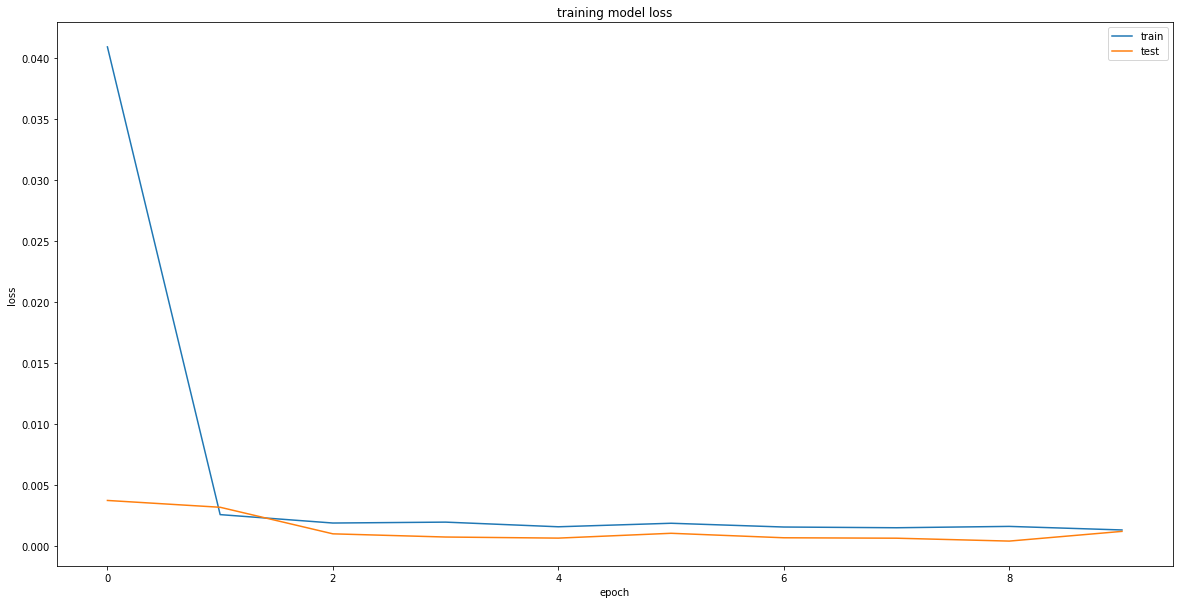

In [ ]:
plt.plot(trainingmodel.history['loss'])
plt.plot(trainingmodel.history['val_loss'])
plt.title('training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
score = model.evaluate(x_train, y_train);
print("Loss:",score)

arr=np.array(data_crossvaltrain['Adj Close']).reshape(-1,1)
crossval_x_scaled, crossval_y, mean_list, std_list = [], [], [], []
for i in range(num_train, len(arr)):
    mean_list.append(np.mean(arr[i-3:i]))
    std_list.append(np.std(arr[i-3:i]))
    crossval_x_scaled.append((arr[i-3:i]-mean_list[i-num_train])/std_list[i-num_train])
    crossval_y.append(arr[i])
crossval_x_scaled = np.array(crossval_x_scaled)
crossval_y = np.array(crossval_y)
scaler_final = MinMaxScaler()
train_crossval_final = scaler_final.fit_transform(arr)

48/48 [==============================] - 0s 3ms/step - loss: 6.7040e-04
Loss: 0.0006704021361656487


output.shape = (503, 1)
RMSE = 1.026
R2 score
0.963680381538734


Text(0, 0.5, 'ADJ CLOSING PRICE')

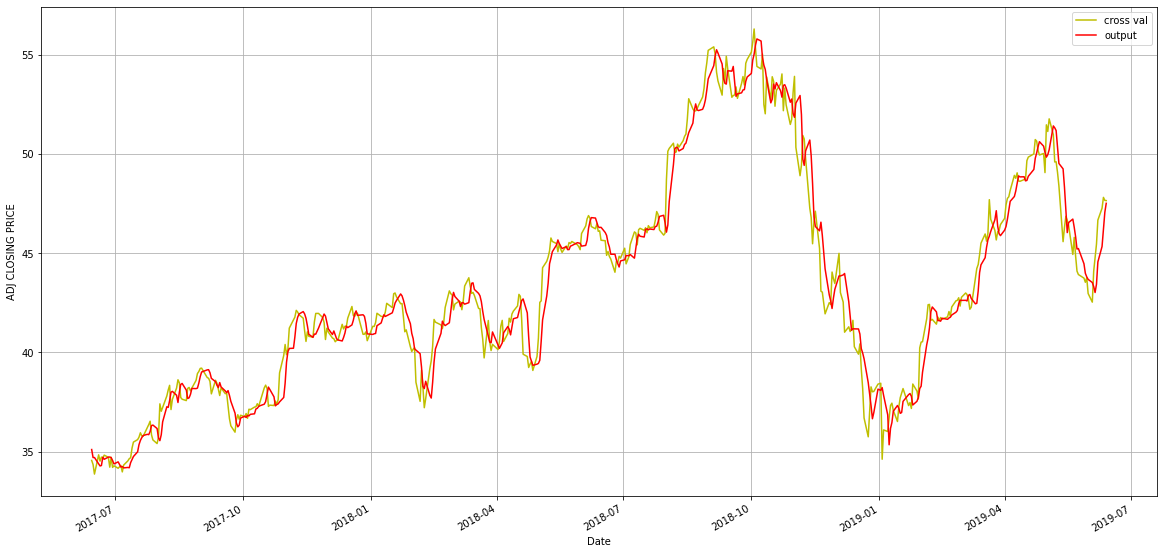

In [ ]:
output=model.predict(crossval_x_scaled)
output = (output * np.array(std_list).reshape(-1,1)) + np.array(mean_list).reshape(-1,1)
print("output.shape = " + str(output.shape))
rmse= math.sqrt(mean_squared_error(crossval_y, output[:,0]))
print("RMSE = %0.3f" % rmse)
print("R2 score")
print(r2_score(crossval_y, output[:,0]))
outputdf = pd.DataFrame({'output': output[:,0].reshape(-1), 
                       'crossval_y': crossval_y.reshape(-1),
                       'Date': data_crossval['Date']})

p = data_crossval.plot(x='Date', y='Adj Close', style='y-', grid=True)
p = outputdf.plot(x='Date', y='output', style='r-', grid=True, ax=p)
p.legend([ 'cross val', 'output'])
p.set_xlabel("Date")
p.set_ylabel("ADJ CLOSING PRICE")


Text(0, 0.5, 'Adj Closing Price')

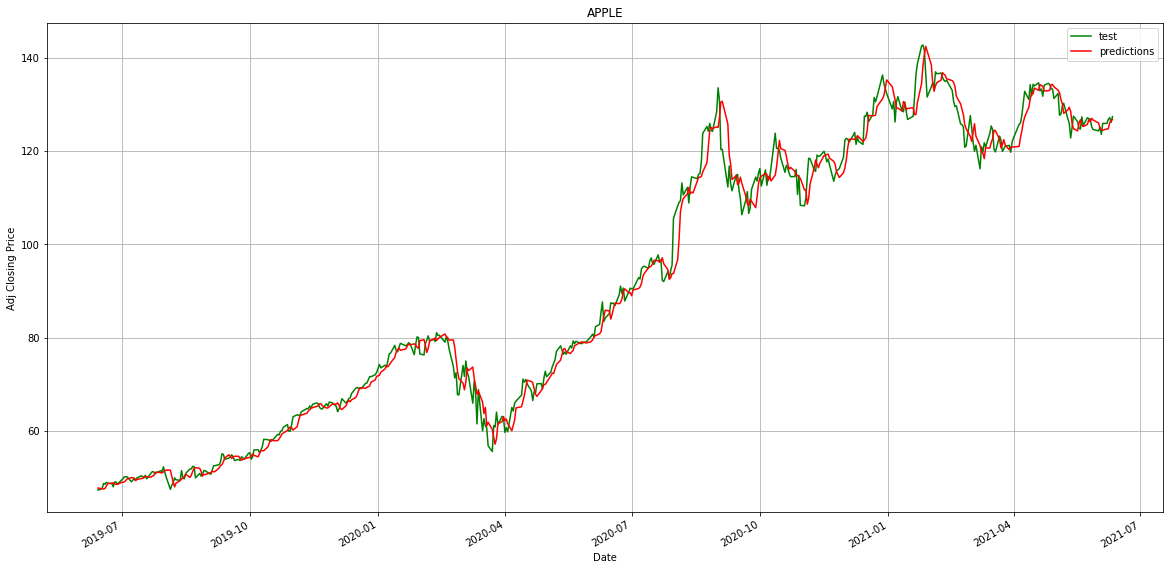

In [ ]:
ar=np.array(data2['Adj Close']).reshape(-1,1)
x_test_scaled, test_y, meantest_list, stdtest_list = [], [], [], []
for i in range(num_train+num_crossval, len(ar)):
    meantest_list.append(np.mean(ar[i-3:i]))
    stdtest_list.append(np.std(ar[i-3:i]))
    x_test_scaled.append((ar[i-3:i]-meantest_list[i-num_train-num_crossval])/stdtest_list[i-num_train-num_crossval])
    test_y.append([i])
x_test_scaled = np.array(x_test_scaled)
test_y = np.array(test_y)
outputtest=model.predict(x_test_scaled)
outputtest = (outputtest * np.array(stdtest_list).reshape(-1,1)) + np.array(meantest_list).reshape(-1,1)
ott_df = pd.DataFrame({'ott': outputtest[:,0].reshape(-1), 
                       'Date': data2[num_train+num_crossval:]['Date']})

p= data_test.plot(x='Date', y='Adj Close', style='g-', grid=True,title="APPLE")
p = ott_df.plot(x='Date', y='ott', style='r-', grid=True, ax=p)
p.legend([ 'test', 'predictions'])
p.set_xlabel("Date")
p.set_ylabel("Adj Closing Price")

# TOYOTA MOTOR

FOR TOYOTA MOTORS
Shape of Training data = (1259, 2)
Shape of Cross Validation data = (629, 2)
Shape of Test Data = (629, 2)


Text(0, 0.5, 'Adj Closing Price')

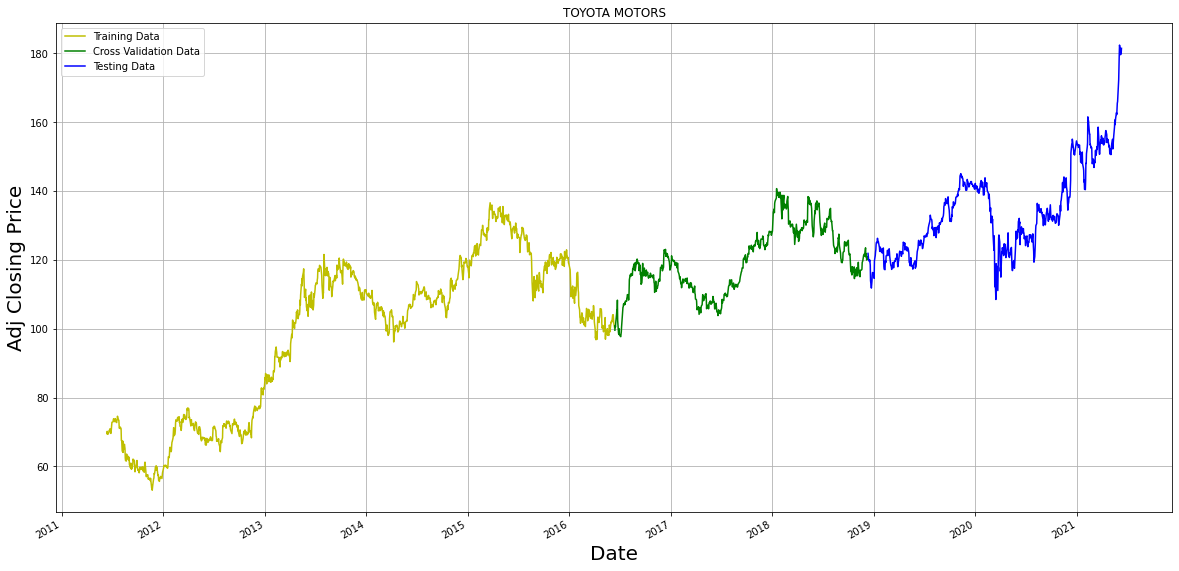

In [ ]:
num_crossval = int(0.25*len(data3))
num_test = int(0.25*len(data3))
num_train = len(data3) - num_crossval - num_test
data_crossvaltrain = data3[:num_train+num_crossval][['Date', 'Adj Close']]
data_train = data3[:num_train][['Date', 'Adj Close']]
data_crossval = data3[num_train:num_train+num_crossval][['Date', 'Adj Close']]
data_test = data3[num_train+num_crossval:][['Date', 'Adj Close']]
print("FOR TOYOTA MOTORS")
print("Shape of Training data = " + str(data_train.shape))
print("Shape of Cross Validation data = " + str(data_crossval.shape))
print("Shape of Test Data = " + str(data_test.shape))

plot = data_train.plot(x='Date', y='Adj Close', style='y-', grid=True,title="TOYOTA MOTORS")
plot = data_crossval.plot(x='Date', y='Adj Close', style='g-', grid=True, ax=plot)
plot = data_test.plot(x='Date', y='Adj Close', style='b-', grid=True, ax=plot)
plot.legend(['Training Data', 'Cross Validation Data', 'Testing Data'])
plot.set_xlabel("Date",fontsize=20)
plot.set_ylabel("Adj Closing Price",fontsize=20)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_train_scaled=scaler.fit_transform(np.array(data_train['Adj Close']).reshape(-1,1))
x_train = []
y_train=[]
for i in range(3, len(data_train_scaled)):
      x_train.append(data_train_scaled[i-3:i,0])
      y_train.append(data_train_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],-1)
y_train=y_train.reshape(y_train.shape[0],-1)   
print(x_train.shape)
print(y_train.shape)
##building the lstm model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

(1256, 3, 1)
(1256, 1)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 3, 50)             10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
51/51 [==============================] - 5s 24ms/step - loss: 0.0858 - val_loss: 0.0119
Epoch 2/10
51/51 [==============================] - 0s 7ms/step - loss: 0.0076 - val_loss: 8.9932e-04
Epoch 3/10
51/51 [==============================] - 0s 8ms/step - loss: 0.0042 - val_loss: 0.0010
Epoch 4/10
51/51 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0012
Epoch 5/10
51/51 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 0.0025
Epoch 6/10
51/51 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 0.0011
Epoch 7/10
51/51 [==============================] - 0s 8ms/step - loss: 0.0034 - val_loss: 9.9640e-04
Epoch 8/10
51/51 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 8.4379e-04
Epoch 9/10
51/51 [==============================] - 0s 8ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 10/10
51/51 [==============================] - 0s 9ms/step - loss: 0.0029 - val_loss: 9.9947e-04


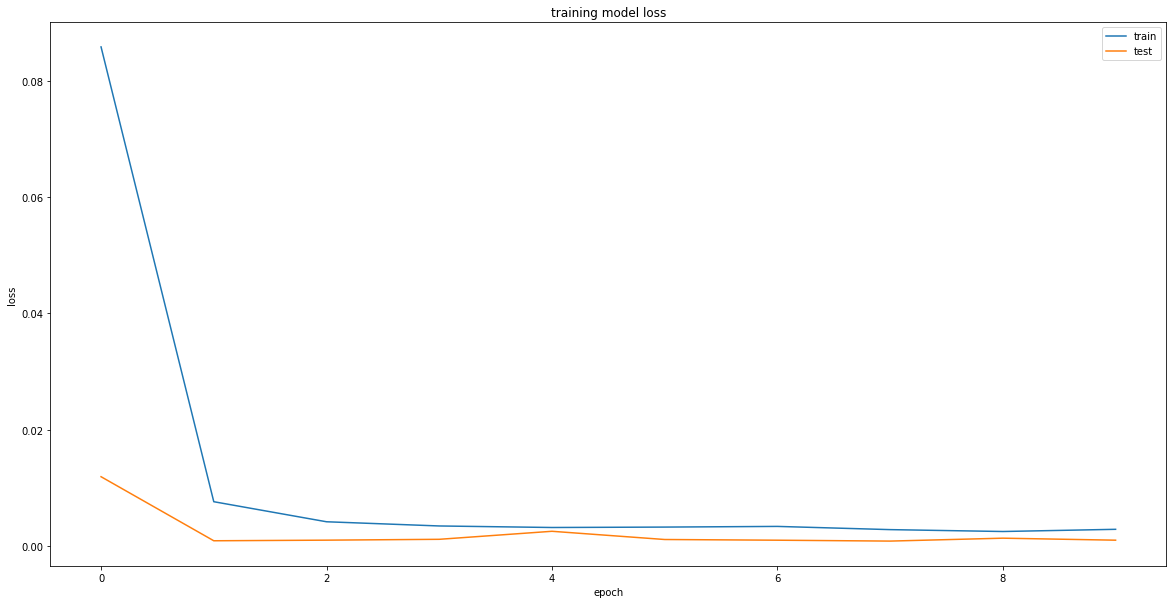

In [ ]:
trainingmodel = model.fit(x_train, y_train, epochs = 10, batch_size = 20, validation_split=0.2)
plt.plot(trainingmodel.history['loss'])
plt.plot(trainingmodel.history['val_loss'])
plt.title('training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
score = model.evaluate(x_train, y_train);
print("Loss:",score)

arr=np.array(data_crossvaltrain['Adj Close']).reshape(-1,1)
crossval_x_scaled, crossval_y, mean_list, std_list = [], [], [], []
for i in range(num_train, len(arr)):
    mean_list.append(np.mean(arr[i-3:i]))
    std_list.append(np.std(arr[i-3:i]))
    crossval_x_scaled.append((arr[i-3:i]-mean_list[i-num_train])/std_list[i-num_train])
    crossval_y.append(arr[i])
crossval_x_scaled = np.array(crossval_x_scaled)
crossval_y = np.array(crossval_y)
scaler_final = MinMaxScaler()
train_crossval_final = scaler_final.fit_transform(arr)

40/40 [==============================] - 0s 2ms/step - loss: 7.2678e-04
Loss: 0.0007267763139680028


output.shape = (629, 1)
RMSE = 1.749
R2 score
0.9662971039248319


Text(0, 0.5, 'ADJ CLOSING PRICE')

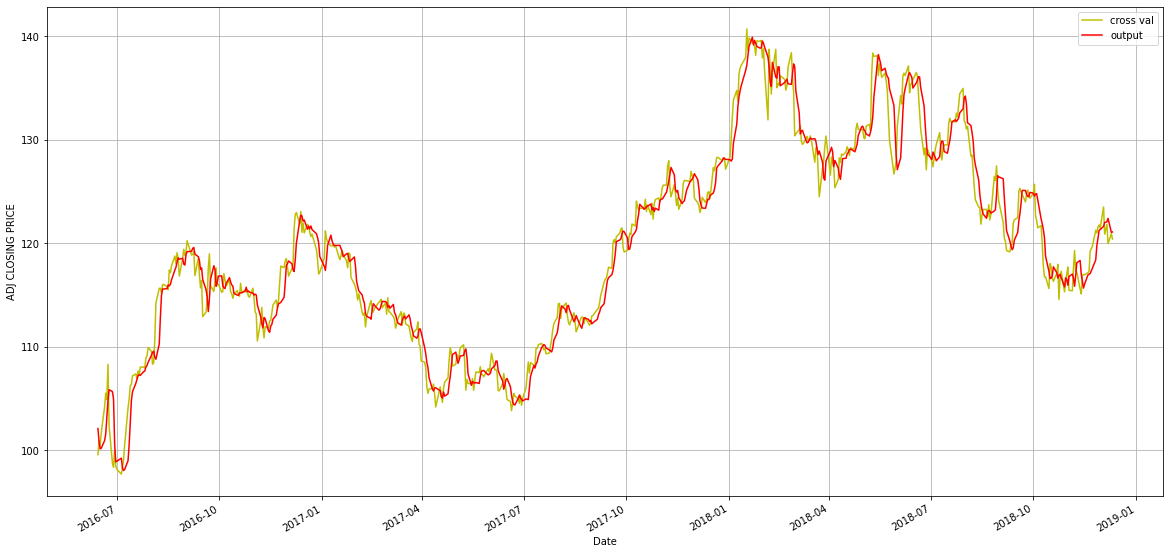

In [ ]:
output=model.predict(crossval_x_scaled)
output = (output * np.array(std_list).reshape(-1,1)) + np.array(mean_list).reshape(-1,1)
print("output.shape = " + str(output.shape))
rmse= math.sqrt(mean_squared_error(crossval_y, output[:,0]))
print("RMSE = %0.3f" % rmse)
print("R2 score")
print(r2_score(crossval_y, output[:,0]))
outputdf = pd.DataFrame({'output': output[:,0].reshape(-1), 
                       'crossval_y': crossval_y.reshape(-1),
                       'Date': data_crossval['Date']})

p = data_crossval.plot(x='Date', y='Adj Close', style='y-', grid=True)
p = outputdf.plot(x='Date', y='output', style='r-', grid=True, ax=p)
p.legend([ 'cross val', 'output'])
p.set_xlabel("Date")
p.set_ylabel("ADJ CLOSING PRICE")


Text(0, 0.5, 'Adj Closing Price')

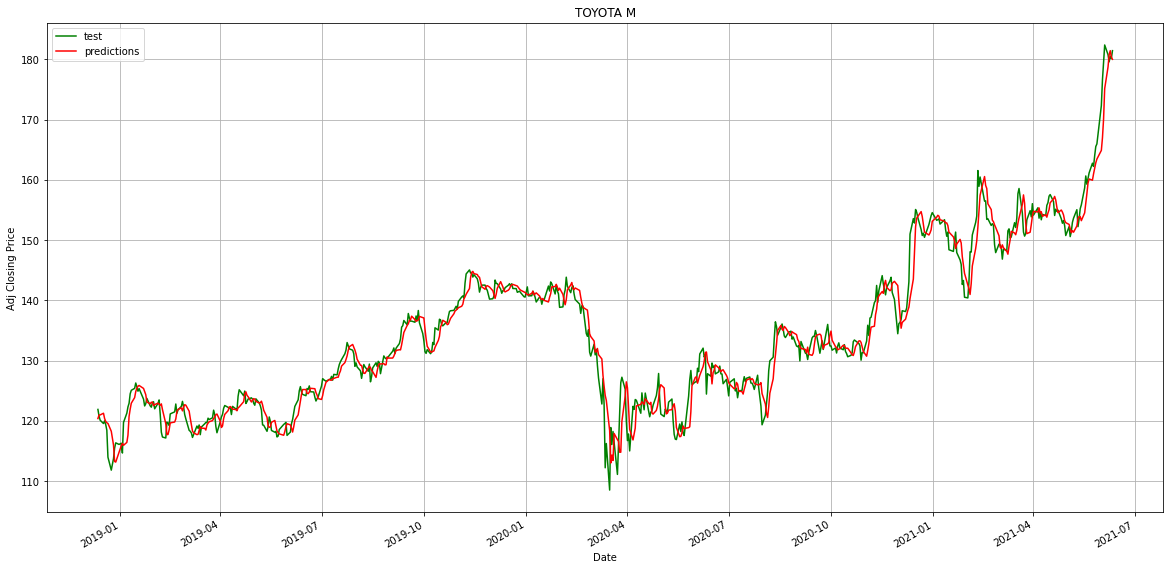

In [ ]:
ar=np.array(data3['Adj Close']).reshape(-1,1)
x_test_scaled, test_y, meantest_list, stdtest_list = [], [], [], []
for i in range(num_train+num_crossval, len(ar)):
    meantest_list.append(np.mean(ar[i-3:i]))
    stdtest_list.append(np.std(ar[i-3:i]))
    x_test_scaled.append((ar[i-3:i]-meantest_list[i-num_train-num_crossval])/stdtest_list[i-num_train-num_crossval])
    test_y.append([i])
x_test_scaled = np.array(x_test_scaled)
test_y = np.array(test_y)
outputtest=model.predict(x_test_scaled)
outputtest = (outputtest * np.array(stdtest_list).reshape(-1,1)) + np.array(meantest_list).reshape(-1,1)
ott_df = pd.DataFrame({'ott': outputtest[:,0].reshape(-1), 
                       'Date': data3[num_train+num_crossval:]['Date']})

p= data_test.plot(x='Date', y='Adj Close', style='g-', grid=True,title="TOYOTA M")
p = ott_df.plot(x='Date', y='ott', style='r-', grid=True, ax=p)
p.legend([ 'test', 'predictions'])
p.set_xlabel("Date")
p.set_ylabel("Adj Closing Price")